In [1]:
import warnings
warnings.filterwarnings("ignore")

import ibis

ibis.options.interactive = True

from streetscapes.sources import SourceType
from streetscapes.models import ModelType
from streetscapes.streetview import SVWorkspace

In [2]:
ws = SVWorkspace("./Amsterdam")

In [3]:
gss = ws.add_source(SourceType.GlobalStreetscapes)
kv = ws.add_source(SourceType.KartaView)
mp = ws.add_source(SourceType.Mapillary)

In [4]:
gss, kv, mp

(GlobalStreetscapesSource(root_dir='~/.cache/huggingface/hub/datasets--NUS-UAL--global-streetscapes'),
 KartaViewSource(root_dir='~/.cache/huggingface/assets/streetscapes/images/karta_view'),
 MapillarySource(root_dir='~/.cache/huggingface/assets/streetscapes/images/mapillary'))

In [5]:
gss.show_contents()

datasets--NUS-UAL--global-streetscapes/
├─blobs/
│ └─ad4fb01eb6ecba9cd36bbc5c05549e428835f7d914ef6d4d457a4ac3faed8743
├─.cache/
│ └─huggingface/
│   ├─.gitignore
│   └─download/
│     └─data/
│       ├─parquet/
│       │ ├─streetscapes.parquet.metadata
│       │ ├─amsterdam.parquet.lock
│       │ └─streetscapes.parquet.lock
│       └─info.csv.lock
├─refs/
│ └─main
├─snapshots/
│ └─7bd2e7697a3cb5f74ff05bd718babdb927f8b60d/
│   └─info.csv
└─data/
  └─parquet/
    ├─subsets/
    │ └─amsterdam.parquet
    └─streetscapes.parquet


In [6]:
x = gss.load_csv("info", gss.root_dir)

In [7]:
x.count()

┌─────┐
│ 410 │
└─────┘

In [8]:
x.head()

┏━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ column0 ┃ Filename    ┃ Overview                                                                ┃ Notes                                                                            ┃ Field              ┃ Format ┃ Explanation                                                     ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64   │ string      │ string                                                                  │ string                                                                           │ string             │ string │ string                                                          │
├─────────┼─────────────┼─────────────────────────────────────────────────────────────────────────┼──────────────────────────────────────────────────────────────────────────────────┼────────────────────┼────────┼─────────────────────────────────────────────────────────────────┤
│       1 │ climate.csv │ Contains the Koppen climate zone associated with each image's location. │ The calculation is as accurate as the location of the image given by the source… │ uuid               │ string │ Universally Unique IDentifier, unique for every image           │
│    NULL │ NULL        │ NULL                                                                    │ NULL                                                                             │ source             │ string │ Source of the image, either Mapillary or KartaView              │
│    NULL │ NULL        │ NULL                                                                    │ NULL                                                                             │ orig_id            │ int    │ Original ID of the image as specified by Mapillary or KartaView │
│    NULL │ NULL        │ NULL                                                                    │ NULL                                                                             │ koppen_geiger_zone │ string │ A zone code to identify the Koppen climate zone                 │
│    NULL │ NULL        │ NULL                                                                    │ NULL                                                                             │ zone_description   │ string │ Short description of the climate zone                           │
└─────────┴─────────────┴─────────────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────────────────────────────────────────┴────────────────────┴────────┴─────────────────────────────────────────────────────────────────┘

In [9]:
ws.sources

{<SourceType.GlobalStreetscapes: 'globalstreetscapes'>: GlobalStreetscapesSource(root_dir='~/.cache/huggingface/hub/datasets--NUS-UAL--global-streetscapes'),
 <SourceType.KartaView: 'kartaview'>: KartaViewSource(root_dir='~/.cache/huggingface/assets/streetscapes/images/karta_view'),
 <SourceType.Mapillary: 'mapillary'>: MapillarySource(root_dir='~/.cache/huggingface/assets/streetscapes/images/mapillary')}

In [10]:
ws.show_contents()

Amsterdam/
├─test.jpg
├─test.png
├─subsets/
│ └─amsterdam.parquet
├─test.jpeg
└─metadata.db


In [11]:
test_file_path = ws.get_path("test/test_file.txt")
test_file_path

PosixPath('Amsterdam/test/test_file.txt')

In [12]:
kv_img_url = kv.get_image_url(1208524)
kv_img_url

'https://storage2.openstreetcam.org/files/photo/2016/5/5/proc/3823_3446d_572b6b13bdfca.jpg'

In [13]:
mp_img_url = mp.get_image_url("4911230068985425")
mp_img_url

'https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/An--rrF4WlM05JH5SMiWxbdSXVWL0mFEymquJWW0EmSjaBemmKBcF8DRGqIe8akNayRiH0VTYunIfeHZlt2zAGA0sYkEkeWIUtnfp27cgiCen37fra1_v0gwTJFgNL5wTiUGkS7F56f_yLBZF1HqZg?edm=ALXxkZ8EAAAA&_nc_gid=R1ppRQAuvo_rREf1perjeA&_nc_oc=Adk5FgjsM_nCaOL9a9sZw1O64VEpbWf3-5F-Yv2VcydDV7RcMLbzkxPFthMbCRadIqs&ccb=10-5&oh=00_AfFXyXAaFDoVLGNJCBCA2AeLf-WSDAIrEJVtJLuk9hLQJg&oe=681F93BC&_nc_sid=201bca'

In [14]:
subset = "subsets/amsterdam"

criteria = {"city": "Amsterdam"}

columns = {'uuid', 'source', 'city', 'lat', 'lon', "orig_id", "source"}

(ams, ams_path) = ws.load_dataset(gss, subset, criteria=criteria, columns=columns, recreate=True, save=True)

Dataset subsets/amsterdam | Done: 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]     


In [15]:
ams_path

PosixPath('Amsterdam/subsets/amsterdam.parquet')

In [16]:
ams.head()

┏━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ source    ┃ lon      ┃ city      ┃ orig_id          ┃ lat       ┃ uuid                                 ┃
┡━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ string    │ float64  │ string    │ int64            │ float64   │ string                               │
├───────────┼──────────┼───────────┼──────────────────┼───────────┼──────────────────────────────────────┤
│ Mapillary │ 4.896877 │ Amsterdam │ 2585835221712723 │ 52.365128 │ 840d52d5-1bbe-4f77-ac5a-5d8905dca06e │
│ Mapillary │ 4.888594 │ Amsterdam │ 4130433687048823 │ 52.371289 │ 6a81f09d-24b9-4179-8eb5-9cd2e91c13d9 │
│ Mapillary │ 4.886883 │ Amsterdam │  219442182852752 │ 52.367758 │ 26c37fae-3485-4ca1-8b97-9f449a8da680 │
│ Mapillary │ 4.895348 │ Amsterdam │ 4077211285668521 │ 52.371188 │ b8ae9b6a-deb3-4e85-a6e9-75c03f77573e │
│ Mapillary │ 4.899779 │ Amsterdam │ 3299296920297092 │ 52.374240 │ 792266c8-eb57-4730-ba26-6dd3551a7b60 │
└───────────┴──────────┴───────────┴──────────────────┴───────────┴──────────────────────────────────────┘

In [17]:
ams.count()

┌───────┐
│ 25950 │
└───────┘

In [18]:
ams_loaded = ws.load_parquet("subsets/amsterdam")

In [19]:
ams_loaded.head().select("uuid", "lon", "lat", "orig_id", "source")

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ uuid                                 ┃ lon      ┃ lat       ┃ orig_id          ┃ source    ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ string                               │ float64  │ float64   │ int64            │ string    │
├──────────────────────────────────────┼──────────┼───────────┼──────────────────┼───────────┤
│ 840d52d5-1bbe-4f77-ac5a-5d8905dca06e │ 4.896877 │ 52.365128 │ 2585835221712723 │ Mapillary │
│ 6a81f09d-24b9-4179-8eb5-9cd2e91c13d9 │ 4.888594 │ 52.371289 │ 4130433687048823 │ Mapillary │
│ 26c37fae-3485-4ca1-8b97-9f449a8da680 │ 4.886883 │ 52.367758 │  219442182852752 │ Mapillary │
│ b8ae9b6a-deb3-4e85-a6e9-75c03f77573e │ 4.895348 │ 52.371188 │ 4077211285668521 │ Mapillary │
│ 792266c8-eb57-4730-ba26-6dd3551a7b60 │ 4.899779 │ 52.374240 │ 3299296920297092 │ Mapillary │
└──────────────────────────────────────┴──────────┴───────────┴──────────────────┴───────────┘

In [20]:
src_table = ams.select({"source": "source", "image_id": "orig_id"})

In [21]:
source_types = ws.get_source_types_from_table(src_table)
source_types

{<SourceType.KartaView: 'kartaview'>, <SourceType.Mapillary: 'mapillary'>}

In [22]:
sample = ws.download_images(src_table, sample=5)

In [23]:
sample

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ source    ┃ image_id         ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ string    │ int64            │
├───────────┼──────────────────┤
│ KartaView │       1204848997 │
│ Mapillary │  790793074904442 │
│ Mapillary │  297803365176390 │
│ KartaView │       1605305033 │
│ Mapillary │ 1245039842562299 │
└───────────┴──────────────────┘

In [24]:
existing, missing = ws.check_image_status(sample)
print(f"==[ existing: {existing}")
print(f"==[ missing: {missing}")

==[ existing: {<SourceType.Mapillary: 'mapillary'>: {PosixPath('/home/hobbes/.cache/huggingface/assets/streetscapes/images/mapillary/297803365176390.jpeg'), PosixPath('/home/hobbes/.cache/huggingface/assets/streetscapes/images/mapillary/1245039842562299.jpeg')}, <SourceType.KartaView: 'kartaview'>: {PosixPath('/home/hobbes/.cache/huggingface/assets/streetscapes/images/karta_view/1204848997.jpeg'), PosixPath('/home/hobbes/.cache/huggingface/assets/streetscapes/images/karta_view/1605305033.jpeg')}}
==[ missing: {<SourceType.Mapillary: 'mapillary'>: {'790793074904442'}, <SourceType.KartaView: 'kartaview'>: set()}


In [25]:
[len(ex) for ex in existing.values()]

[2, 2]

In [26]:
source_types

{<SourceType.KartaView: 'kartaview'>, <SourceType.Mapillary: 'mapillary'>}

In [27]:
mf = ws.spawn_model(ModelType.MaskFormer)

In [28]:
labels = {
    "sky": None,
    "building": {
        "window": None,
        "door": None,
    },
    "tree": None,
    "car": None,
    "truck": None,
    "road": None,
}

In [29]:
mf_segmentations = ws.segment_from_dataset(sample, mf, labels, batch_size=1)

Done: 100%|██████████| 2/2 [00:25<00:00, 12.81s/it]


In [30]:
mf_segmentations[0].mask_path

PosixPath('/home/hobbes/.cache/huggingface/assets/streetscapes/images/mapillary/masks/maskformer/297803365176390.npz')

In [33]:
mf_segmentations[0].get_instance_table().select('label').distinct()

┏━━━━━━━━━━┓
┃ label    ┃
┡━━━━━━━━━━┩
│ string   │
├──────────┤
│ sky      │
│ building │
│ sidewalk │
│ bicycle  │
└──────────┘

(<Figure size 1600x600 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

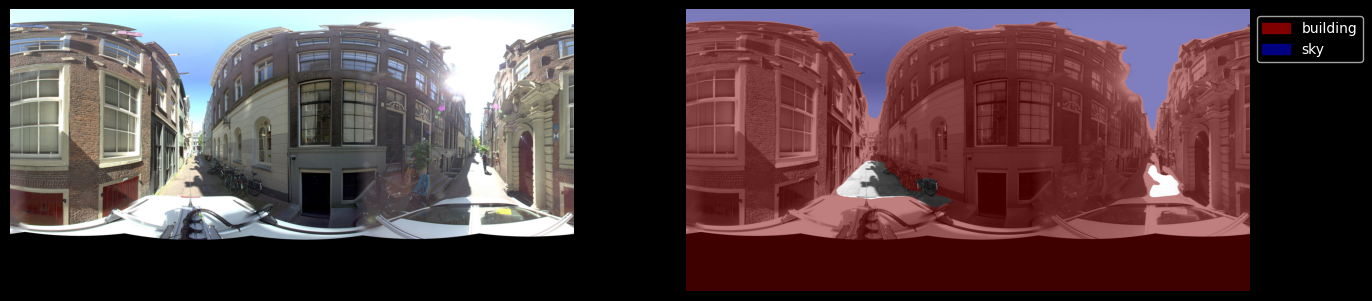

In [35]:
mf_segmentations[0].visualise(['sky', "person", "building"])

In [ ]:
building = mf_segmentations[0].get_instances("building")

(<Figure size 1600x600 with 1 Axes>, <Axes: >)

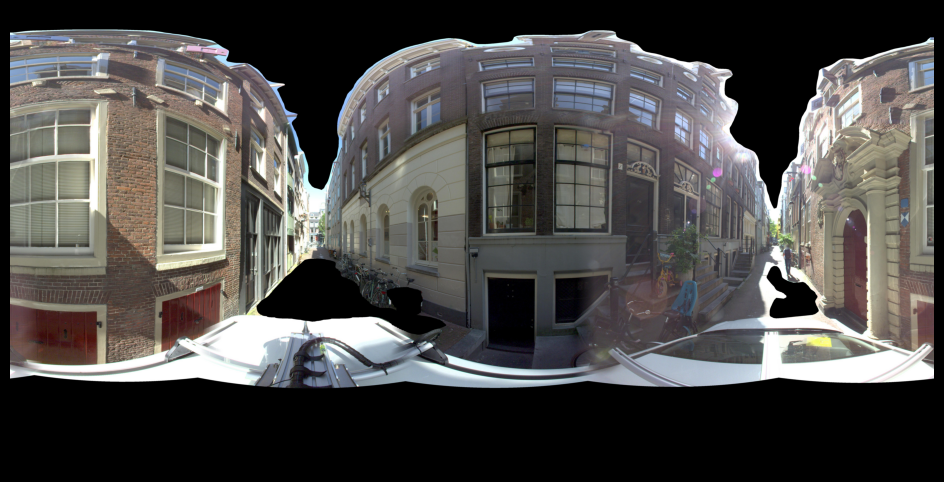

In [ ]:
building[0].visualise(mf_segmentations[0].get_image())

In [46]:
ds = ws.spawn_model(ModelType.DinoSAM)

In [47]:
ds_segmentations = ws.segment_from_dataset(sample, ds, labels, batch_size=1)

Done: 100%|██████████| 2/2 [00:52<00:00, 26.15s/it]


In [ ]:
ds_segmentations[0].instances().select('label').distinct()

In [ ]:
ds_segmentations[0].visualise()

In [ ]:
ds_segmentations[0].get_instances("sky")